In [83]:
import numpy as np
import pandas as pd
import pandas_datareader.data as pdweb
from pandas_datareader import data as pdr 


In [84]:
import yfinance as yf 

In [85]:
import matplotlib.pyplot as plt 
%matplotlib inline

In [86]:
SP = pdr.get_data_yahoo('^GSPC', start = '1980-01-01', end ='2020-02-20')

In [87]:
SP.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1980-01-02,108.430000,105.290001,107.940002,105.760002,40610000,105.760002
1980-01-03,106.080002,103.260002,105.760002,105.220001,50480000,105.220001
1980-01-04,107.080002,105.089996,105.220001,106.519997,39130000,106.519997
1980-01-07,107.800003,105.800003,106.519997,106.809998,44500000,106.809998
1980-01-08,109.290001,106.290001,106.809998,108.949997,53390000,108.949997


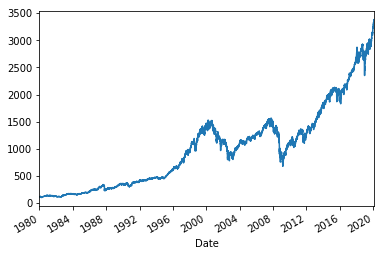

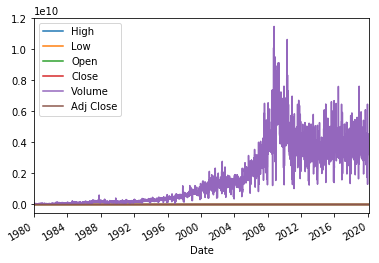

In [88]:
SPClose = SP["Adj Close"]
SPClose = SP["Adj Close"].plot()
SP.plot()

In [89]:
SPClose_PCT = SP["Adj Close"].pct_change()

In [90]:
VIX = pdr.get_data_yahoo('^VIX', start = '1980-01-01', end ='2020-02-20')

In [91]:
VIX.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1990-01-02,17.240000,17.240000,17.240000,17.240000,0,17.240000
1990-01-03,18.190001,18.190001,18.190001,18.190001,0,18.190001
1990-01-04,19.219999,19.219999,19.219999,19.219999,0,19.219999
1990-01-05,20.110001,20.110001,20.110001,20.110001,0,20.110001
1990-01-08,20.260000,20.260000,20.260000,20.260000,0,20.260000


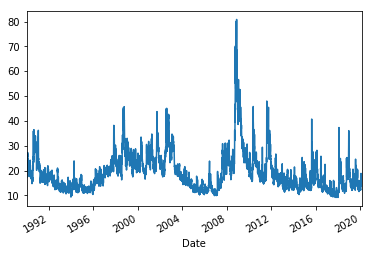

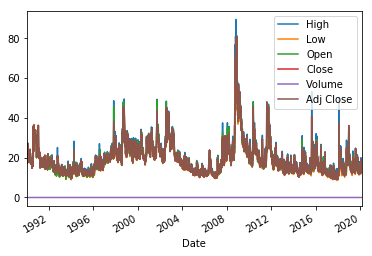

In [92]:
VIXClose = VIX["Adj Close"].plot()
VIX.plot()

In [93]:
VIX_PCT_CHANGE = VIX['Adj Close'].pct_change()

In [94]:
VIX_PCT_CHANGE.head()

Date
1990-01-02         NaN
1990-01-03    0.055104
1990-01-04    0.056624
1990-01-05    0.046306
1990-01-08    0.007459
Name: Adj Close, dtype: float64

In [95]:
SP_df=pd.DataFrame(SPClose_PCT.dropna())
VIX_df=pd.DataFrame(VIX_PCT_CHANGE.dropna())

In [96]:
SP_df.head()

,Adj Close
Date,
1980-01-03,-0.005106
1980-01-04,0.012355
1980-01-07,0.002723
1980-01-08,0.020036
1980-01-09,0.000918


In [97]:
# SP_df.join(VIX_df, ['Date'])

In [98]:
# SP_df.join(VIX_df.set_index('Adj Close'))

In [99]:
Data = pd.merge(SP_df,VIX_df, how='inner', left_index=True, right_index=True)

In [100]:
Data.head()

,Adj Close_x,Adj Close_y
Date,,
1990-01-03,-0.002586,0.055104
1990-01-04,-0.008613,0.056624
1990-01-05,-0.009756,0.046306
1990-01-08,0.004514,0.007459
1990-01-09,-0.011787,0.095755


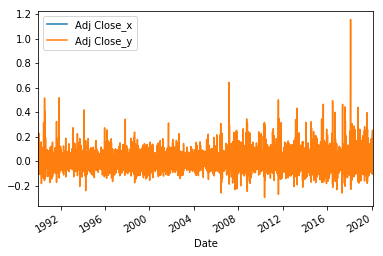

In [101]:
Data.plot()

# Now to TensorFlow

## What to do now?


In [121]:
Data.shape

(7592, 2)

In [113]:
Data.info()
Data.describe()
# Data.columns()
Data.index

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7592 entries, 1990-01-03 to 2020-02-20
Data columns (total 2 columns):
Adj Close_x    7592 non-null float64
Adj Close_y    7592 non-null float64
dtypes: float64(2)
memory usage: 177.9 KB


DatetimeIndex(['1990-01-03', '1990-01-04', '1990-01-05', '1990-01-08',
               '1990-01-09', '1990-01-10', '1990-01-11', '1990-01-12',
               '1990-01-15', '1990-01-16',
               ...
               '2020-02-06', '2020-02-07', '2020-02-10', '2020-02-11',
               '2020-02-12', '2020-02-13', '2020-02-14', '2020-02-18',
               '2020-02-19', '2020-02-20'],
              dtype='datetime64[ns]', name='Date', length=7592, freq=None)

In [158]:
#Data = Data.drop(['Date'], axis=1)

#Data['Adj Close_x']


Date
1990-01-03   -0.002586
1990-01-04   -0.008613
1990-01-05   -0.009756
1990-01-08    0.004514
1990-01-09   -0.011787
1990-01-10   -0.006607
1990-01-11    0.003513
1990-01-12   -0.024675
1990-01-15   -0.008619
1990-01-16    0.011128
1990-01-17   -0.009831
1990-01-18    0.002341
1990-01-19    0.002839
1990-01-22   -0.025859
1990-01-23    0.003723
1990-01-24   -0.004071
1990-01-25   -0.012657
1990-01-26   -0.000859
1990-01-29   -0.001842
1990-01-30   -0.006827
1990-01-31    0.018887
1990-02-01   -0.000881
1990-02-02    0.006478
1990-02-05    0.002810
1990-02-06   -0.006599
1990-02-07    0.012407
1990-02-08   -0.002367
1990-02-09    0.001982
1990-02-12   -0.010611
1990-02-13    0.002848
                ...   
2020-01-08    0.004902
2020-01-09    0.006655
2020-01-10   -0.002855
2020-01-13    0.006976
2020-01-14   -0.001515
2020-01-15    0.001870
2020-01-16    0.008367
2020-01-17    0.003862
2020-01-21   -0.002652
2020-01-22    0.000289
2020-01-23    0.001141
2020-01-24   -0.009042
2020-0

In [153]:
#from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras

In [124]:
tf.keras.Sequential()

In [132]:
def univariate_data(dataset, start_index, end_index, history_size, target_size):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i)
    # Reshape data from (history_size,) to (history_size, 1)
    data.append(np.reshape(dataset[indices], (history_size, 1)))
    labels.append(dataset[i+target_size])

    return np.array(data), np.array(labels)

In [140]:
TRAIN_SPLIT = 5314

In [141]:
univariate_past_history = 20
univariate_future_target = 0

x_train_uni, y_train_uni = univariate_data(Data, 0, TRAIN_SPLIT,
                                           univariate_past_history,
                                           univariate_future_target)
x_val_uni, y_val_uni = univariate_data(Data, TRAIN_SPLIT, None,
                                       univariate_past_history,
                                       univariate_future_target)

KeyError: "None of [Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,\n            19],\n           dtype='int64')] are in the [columns]"

In [129]:
const_model = tf.keras.Sequential([
   tf.keras.layers.LSTM(8, input_shape=Data.shape),
     tf.keras.layers.Dense(1)
 ])



In [130]:
const_model.compile(optimizer='adam', loss='mae')

In [ ]:
const_model.fit(Data, epochs=10, steps_per_epoch=100, validation_data=, validation_steps=20)

In [ ]:
# predict ! 